In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
training_path = "/content/drive/MyDrive/Colab Notebooks/STATS101C Project/Data/best_training_data2.xlsx"
best_training_data = pd.read_excel(training_path)

testing_path = "/content/drive/MyDrive/Colab Notebooks/STATS101C Project/Data/best_testing_data2.xlsx"
best_testing_data = pd.read_excel(testing_path)

best_X_train = best_training_data.drop("W/L", axis=1)
best_y_train = best_training_data["W/L"]

best_X_test = best_testing_data.drop("W/L", axis=1)
best_y_test = best_testing_data["W/L"]

In [ ]:
# original_path = "/content/drive/MyDrive/Colab Notebooks/STATS101C Project/Data/orginal_testing_data.xlsx"
# original_testing_data = pd.read_excel(original_path)

# orginal_path = "/content/drive/MyDrive/Colab Notebooks/STATS101C Project/Data/orginal_training_data.xlsx"
# original_training_data = pd.read_excel(orginal_path)

# original_X_train = original_training_data.drop("W/L", axis=1)
# original_y_train = original_training_data["W/L"]

# original_X_test = original_testing_data.drop("W/L", axis=1)
# original_y_test = original_testing_data["W/L"]

In [ ]:
# reduced_path = "/content/drive/MyDrive/Colab Notebooks/STATS101C Project/Data/reduced_testing_data.xlsx"
# reduced_testing_data = pd.read_excel(reduced_path)

# reduced_path = "/content/drive/MyDrive/Colab Notebooks/STATS101C Project/Data/reduced_training_data.xlsx"
# reduced_training_data = pd.read_excel(reduced_path)

# reduced_X_train = reduced_training_data.drop("W/L", axis=1)
# reduced_y_train = reduced_training_data["W/L"]

# reduced_X_test = reduced_testing_data.drop("W/L", axis=1)
# reduced_y_test = reduced_testing_data["W/L"]

In [ ]:
best_X_train.shape

(1770, 24)

In [ ]:
best_X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770 entries, 0 to 1769
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   home_game               1770 non-null   int64  
 1   Pre_mean_diff_MIN       1770 non-null   float64
 2   Pre_mean_diff_PTS       1770 non-null   float64
 3   Pre_mean_diff_FGM       1770 non-null   float64
 4   Pre_mean_diff_FGA       1770 non-null   float64
 5   Pre_mean_diff_FG%       1770 non-null   float64
 6   Pre_mean_diff_3PM       1770 non-null   float64
 7   Pre_mean_diff_3PA       1770 non-null   float64
 8   Pre_mean_diff_3P%       1770 non-null   float64
 9   Pre_mean_diff_FTM       1770 non-null   float64
 10  Pre_mean_diff_FTA       1770 non-null   float64
 11  Pre_mean_diff_FT%       1770 non-null   float64
 12  Pre_mean_diff_OREB      1770 non-null   float64
 13  Pre_mean_diff_DREB      1770 non-null   float64
 14  Pre_mean_diff_REB       1770 non-null   

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Train your model and test your model
def train_test_predict(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
  print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
  disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred),
                              display_labels = model.classes_)
  disp.plot(cmap=plt.cm.Blues)

  return model

Accuracy: 0.6391304347826087
Classification Report: 
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       345
           1       0.64      0.64      0.64       345

    accuracy                           0.64       690
   macro avg       0.64      0.64      0.64       690
weighted avg       0.64      0.64      0.64       690



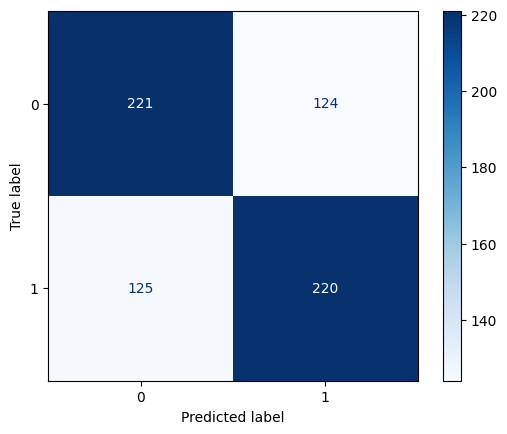

In [ ]:
full_lg = LogisticRegression(penalty="l1", solver="liblinear", max_iter=10000)
full_lg = train_test_predict(full_lg, best_X_train, best_X_test, best_y_train, best_y_test)

Accuracy: 0.6434782608695652
Classification Report: 
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       345
           1       0.65      0.63      0.64       345

    accuracy                           0.64       690
   macro avg       0.64      0.64      0.64       690
weighted avg       0.64      0.64      0.64       690



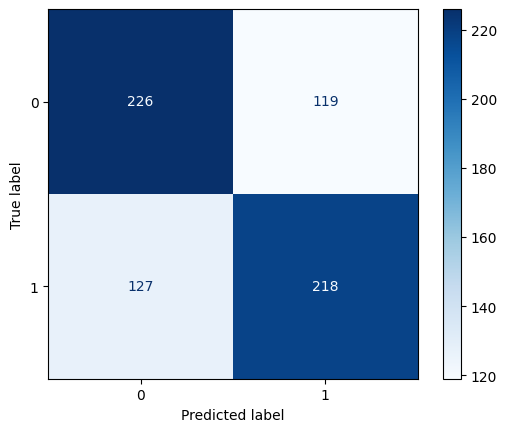

In [ ]:
full_rf = RandomForestClassifier(n_estimators=5, max_depth=3)
full_rf = train_test_predict(full_rf, best_X_train, best_X_test, best_y_train, best_y_test)

Accuracy: 0.6275362318840579
Classification Report: 
              precision    recall  f1-score   support

           0       0.63      0.63      0.63       345
           1       0.63      0.62      0.62       345

    accuracy                           0.63       690
   macro avg       0.63      0.63      0.63       690
weighted avg       0.63      0.63      0.63       690



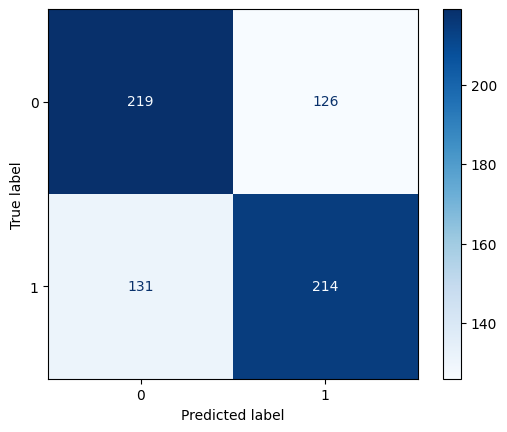

In [ ]:
full_xgb = XGBClassifier(n_estimators = 5, max_depth=3, learning_rate = 0.15)
full_xgb = train_test_predict(full_xgb, best_X_train, best_X_test, best_y_train, best_y_test)

## Select features from dataset including the additional variable

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
forward_feature_selection_lg = SequentialFeatureSelector(
    LogisticRegression(penalty="l1", solver="liblinear", max_iter=10000),
    n_features_to_select="auto",
    direction="forward",
    scoring="accuracy",
)

In [ ]:
forward_feature_selection_rf = SequentialFeatureSelector(
    RandomForestClassifier(n_estimators = 5, max_depth = 3),
    n_features_to_select="auto",
    direction="forward",
    scoring="accuracy",
)

In [ ]:
forward_feature_selection_xgb = SequentialFeatureSelector(
    XGBClassifier(n_estimators = 5, max_depth = 3, learning_rate = 0.15),
    n_features_to_select="auto",
    direction="forward",
    scoring="accuracy",
)

In [ ]:
forward_feature_selection_lg.fit(best_X_train, best_y_train)

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=10000,
                                                       penalty='l1',
                                                       solver='liblinear'),
                          scoring='accuracy')

In [ ]:
forward_feature_selection_rf.fit(best_X_train, best_y_train)

SequentialFeatureSelector(estimator=RandomForestClassifier(max_depth=3,
                                                           n_estimators=5),
                          scoring='accuracy')

In [ ]:
forward_feature_selection_xgb.fit(best_X_train, best_y_train)

SequentialFeatureSelector(estimator=XGBClassifier(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  device=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  gamma=None, grow_policy=None,
                                                  importance_type=None,
                                                  interaction_constraints=None,
                                                  learning_rate=0.15,
                                                  max_bin=None,
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=3, max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=5, n_jobs=None,
                                                  num_parallel_tree=None,
                                                  random_state=None, ...),
                          scoring='accuracy')

In [ ]:
forward_feature_selection_lg.get_feature_names_out()

array(['home_game', 'Pre_mean_diff_MIN', 'Pre_mean_diff_FGM',
       'Pre_mean_diff_FGA', 'Pre_mean_diff_FG%', 'Pre_mean_diff_3PM',
       'Pre_mean_diff_OREB', 'Pre_mean_diff_DREB', 'Pre_mean_diff_REB',
       'Pre_mean_diff_+/-', 'Weight', 'Pre_mean_AST_TOV_Ratio'],
      dtype=object)

In [ ]:
forward_feature_selection_rf.get_feature_names_out()

array(['home_game', 'Pre_mean_diff_MIN', 'Pre_mean_diff_PTS',
       'Pre_mean_diff_FGA', 'Pre_mean_diff_FG%', 'Pre_mean_diff_3PM',
       'Pre_mean_diff_3PA', 'Pre_mean_diff_3P%', 'Pre_mean_diff_TOV',
       'Pre_mean_diff_+/-', 'Pre_Total_Wins', 'Weight'], dtype=object)

In [ ]:
forward_feature_selection_xgb.get_feature_names_out()

array(['Pre_mean_diff_MIN', 'Pre_mean_diff_PTS', 'Pre_mean_diff_FGM',
       'Pre_mean_diff_FG%', 'Pre_mean_diff_3P%', 'Pre_mean_diff_FTM',
       'Pre_mean_diff_FTA', 'Pre_mean_diff_BLK', 'Pre_mean_diff_TOV',
       'Pre_mean_diff_+/-', 'Pre_Total_Wins', 'Weight'], dtype=object)

## Select the best predictors

In [ ]:
selected_training_features_lg = best_training_data[['home_game', 'Pre_mean_diff_MIN', 'Pre_mean_diff_FGM',
       'Pre_mean_diff_FGA', 'Pre_mean_diff_FG%', 'Pre_mean_diff_3PM',
       'Pre_mean_diff_OREB', 'Pre_mean_diff_DREB', 'Pre_mean_diff_REB',
       'Pre_mean_diff_+/-', 'Weight', 'Pre_mean_AST_TOV_Ratio']]

selected_testing_features_lg = best_testing_data[['home_game', 'Pre_mean_diff_MIN', 'Pre_mean_diff_FGM',
       'Pre_mean_diff_FGA', 'Pre_mean_diff_FG%', 'Pre_mean_diff_3PM',
       'Pre_mean_diff_OREB', 'Pre_mean_diff_DREB', 'Pre_mean_diff_REB',
       'Pre_mean_diff_+/-', 'Weight', 'Pre_mean_AST_TOV_Ratio']]

In [ ]:
selected_testing_features_lg.shape

(690, 12)

In [ ]:
selected_training_features_rf = best_training_data[['home_game', 'Pre_mean_diff_MIN', 'Pre_mean_diff_PTS',
       'Pre_mean_diff_FGA', 'Pre_mean_diff_FG%', 'Pre_mean_diff_3PM',
       'Pre_mean_diff_3PA', 'Pre_mean_diff_3P%', 'Pre_mean_diff_TOV',
       'Pre_mean_diff_+/-', 'Pre_Total_Wins', 'Weight']]

selected_testing_features_rf = best_testing_data[['home_game', 'Pre_mean_diff_MIN', 'Pre_mean_diff_PTS',
       'Pre_mean_diff_FGA', 'Pre_mean_diff_FG%', 'Pre_mean_diff_3PM',
       'Pre_mean_diff_3PA', 'Pre_mean_diff_3P%', 'Pre_mean_diff_TOV',
       'Pre_mean_diff_+/-', 'Pre_Total_Wins', 'Weight']]

In [ ]:
selected_testing_features_rf.shape

(690, 12)

In [ ]:
selected_training_features_xgb = best_training_data[['Pre_mean_diff_MIN', 'Pre_mean_diff_PTS', 'Pre_mean_diff_FGM',
       'Pre_mean_diff_FG%', 'Pre_mean_diff_3P%', 'Pre_mean_diff_FTM',
       'Pre_mean_diff_FTA', 'Pre_mean_diff_BLK', 'Pre_mean_diff_TOV',
       'Pre_mean_diff_+/-', 'Pre_Total_Wins', 'Weight']]

selected_testing_features_xgb = best_testing_data[['Pre_mean_diff_MIN', 'Pre_mean_diff_PTS', 'Pre_mean_diff_FGM',
       'Pre_mean_diff_FG%', 'Pre_mean_diff_3P%', 'Pre_mean_diff_FTM',
       'Pre_mean_diff_FTA', 'Pre_mean_diff_BLK', 'Pre_mean_diff_TOV',
       'Pre_mean_diff_+/-', 'Pre_Total_Wins', 'Weight']]

In [ ]:
selected_testing_features_xgb.shape

(690, 12)

Accuracy: 0.6463768115942029
Classification Report: 
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       345
           1       0.65      0.64      0.65       345

    accuracy                           0.65       690
   macro avg       0.65      0.65      0.65       690
weighted avg       0.65      0.65      0.65       690



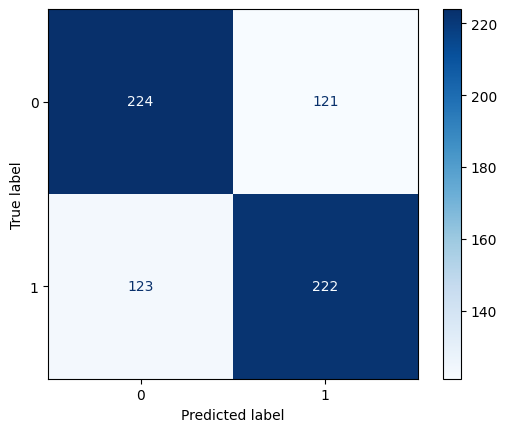

In [ ]:
best_subset_lg = LogisticRegression(penalty="l1", solver="liblinear", max_iter=1000)
best_subset_lg = train_test_predict(best_subset_lg,
                                    selected_training_features_lg,
                                    selected_testing_features_lg,
                                    best_y_train,
                                    best_y_test)

Accuracy: 0.6463768115942029
Classification Report: 
              precision    recall  f1-score   support

           0       0.66      0.62      0.64       345
           1       0.64      0.68      0.66       345

    accuracy                           0.65       690
   macro avg       0.65      0.65      0.65       690
weighted avg       0.65      0.65      0.65       690



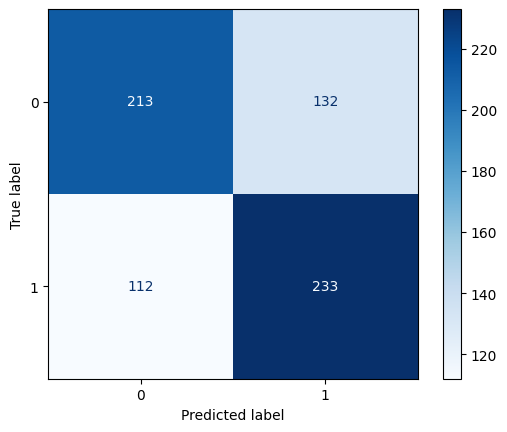

In [ ]:
best_subset_rf = RandomForestClassifier(n_estimators = 100, max_depth = 5)
best_subset_rf = train_test_predict(best_subset_rf,
                                    selected_training_features_rf,
                                    selected_testing_features_rf,
                                    best_y_train,
                                    best_y_test)

Accuracy: 0.6492753623188405
Classification Report: 
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       345
           1       0.65      0.65      0.65       345

    accuracy                           0.65       690
   macro avg       0.65      0.65      0.65       690
weighted avg       0.65      0.65      0.65       690



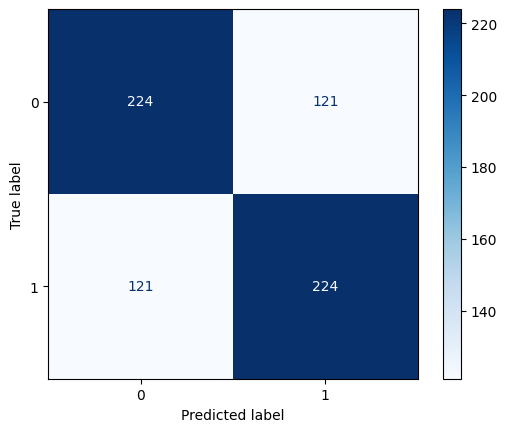

In [ ]:
best_subset_xgb = XGBClassifier(n_estimators = 10, max_depth = 3)
best_subset_xgb = train_test_predict(best_subset_xgb,
                                    selected_training_features_xgb,
                                    selected_testing_features_xgb,
                                    best_y_train,
                                    best_y_test)

In [ ]:
best_subset_lg.coef_

array([[ 5.45204066e-01,  3.84513875e-02, -1.09163448e+00,
         4.33166857e-01,  9.93060560e-01,  1.02515187e-01,
        -1.97671964e-02,  0.00000000e+00, -3.65028056e-03,
         6.77588723e-02, -2.18701077e-04,  0.00000000e+00]])

In [ ]:
pd.DataFrame({"Features": selected_training_features_lg.columns,
              "weights": best_subset_lg.coef_[0]})

,Features,weights
0,home_game,0.545204
1,Pre_mean_diff_MIN,0.038451
2,Pre_mean_diff_FGM,-1.091634
3,Pre_mean_diff_FGA,0.433167
4,Pre_mean_diff_FG%,0.993061
5,Pre_mean_diff_3PM,0.102515
6,Pre_mean_diff_OREB,-0.019767
7,Pre_mean_diff_DREB,0.000000
8,Pre_mean_diff_REB,-0.003650
9,Pre_mean_diff_+/-,0.067759


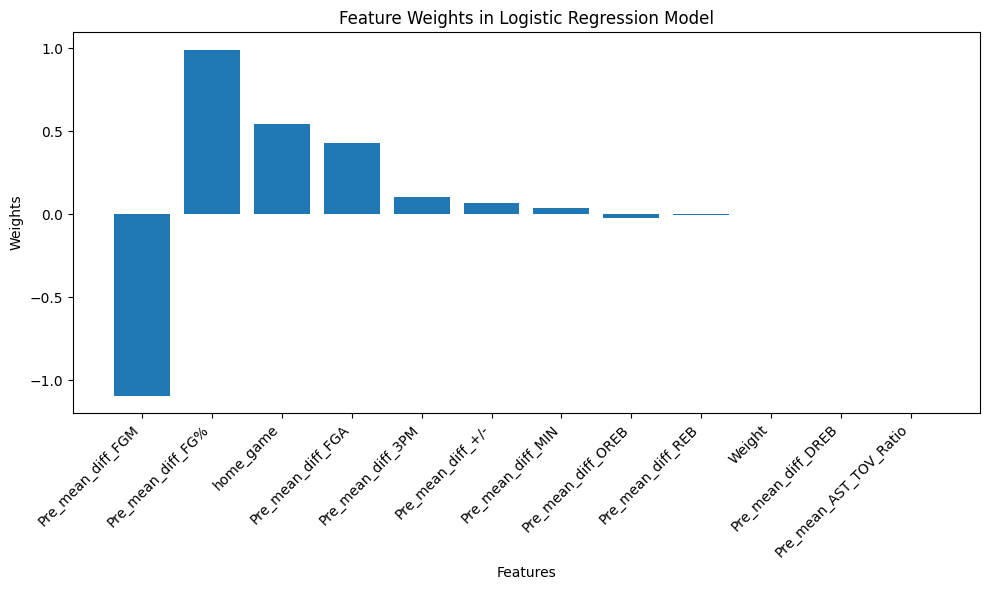

In [ ]:
weights_df = pd.DataFrame({"Features": selected_training_features_lg.columns,
              "weights": best_subset_lg.coef_[0]}).sort_values(by=['weights'], key=abs, ascending=False)


# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(weights_df['Features'], weights_df['weights'])
plt.xlabel("Features")
plt.ylabel("Weights")
plt.title("Feature Weights in Logistic Regression Model")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

## Fine-tuning

## PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
accuracy = []
peanlty_strength = []

for i in range(1,13):
  # pca
  pca = PCA(n_components=i)
  pca.fit(selected_training_features_lg)
  training_pca_compnonets = pca.transform(selected_training_features_lg)
  testing_pca_compnonets = pca.transform(selected_testing_features_lg)

  # Logistic Regression
  liblinear_log_model = LogisticRegressionCV(Cs=[2, 5, 7, 10],
                                 cv = 5,
                                 penalty="l1",
                                 solver="liblinear",
                                max_iter=1000)

  liblinear_log_model.fit(training_pca_compnonets, best_y_train)
  y_pred = liblinear_log_model.predict(testing_pca_compnonets)

  # false psotive, true positive, auc_score, overall accuracy
  accuracy.append(accuracy_score(best_y_test, y_pred))
  peanlty_strength.append(liblinear_log_model.C_)

In [ ]:
log_model_results = pd.DataFrame({
    "pca_n_components": range(1, 13),
    "peanlty_strength": peanlty_strength,
    "accuracy": accuracy
})

In [ ]:
log_model_results

,pca_n_components,peanlty_strength,accuracy
0,1,[2],0.500000
1,2,[5],0.685507
2,3,[7],0.655072
3,4,[5],0.652174
4,5,[2],0.649275
5,6,[5],0.643478
6,7,[5],0.639130
7,8,[2],0.643478
8,9,[2],0.640580
9,10,[5],0.640580


In [ ]:
log_model_results.to_csv("/content/drive/MyDrive/Colab Notebooks/STATS101C Project/Code/log_model_results.csv")

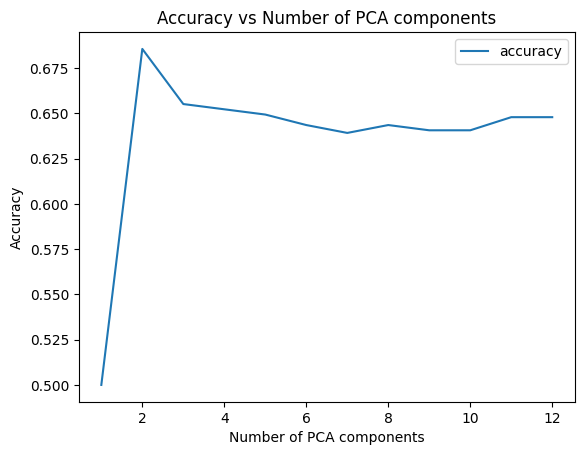

In [ ]:
sns.lineplot(x=range(1, 13), y=accuracy, label="accuracy")
plt.xlabel("Number of PCA components")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of PCA components")
plt.show()

In [ ]:
# weights_df = pd.DataFrame({"Features": ["z1", "z2"],
#               "weights": liblinear_log_model.coef_[0]}).sort_values(by=['weights'], key=abs, ascending=False)


# # Create the plot
# plt.figure(figsize=(10, 6))  # Adjust figure size if needed
# plt.bar(weights_df['Features'], weights_df['weights'])
# plt.xlabel("Features")
# plt.ylabel("Weights")
# plt.title("Feature Weights in Logistic Regression Model")
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
# plt.tight_layout()  # Adjust layout to prevent labels from overlapping
# plt.show()

### XGB

In [ ]:
xgb_params = {
    "n_estimators": [5, 10, 50, 100],
    "max_depth": [3, 5, 10],
    "learning_rate" : [0.1, 0.15, 0.2]
}

In [ ]:
accuracy = []
params = []

for i in range(1, 13):
  print(i)
  # pca
  pca = PCA(n_components=i)
  pca.fit(selected_training_features_xgb)
  training_pca_compnonets = pca.transform(selected_training_features_xgb)
  testing_pca_compnonets = pca.transform(selected_testing_features_xgb)

  # Logistic Regression
  pca_xgb = XGBClassifier()
  pca_xgb_grid = GridSearchCV(pca_xgb, xgb_params)

  pca_xgb_grid.fit(training_pca_compnonets, best_y_train)
  params.append(pca_xgb_grid.best_params_)
  accuracy.append(pca_xgb_grid.best_score_)

1
2
3
4
5
6
7
8
9
10
11
12


In [ ]:
xgb_model_results = pd.DataFrame({
    "pca_n_components": range(1, 13),
    "params": params,
    "accuracy": accuracy
})

In [ ]:
xgb_model_results = xgb_model_results.sort_values(by="accuracy", ascending=False).reset_index(drop=True)
xgb_model_results

,pca_n_components,params,accuracy
0,6,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.641808
1,9,"{'learning_rate': 0.15, 'max_depth': 3, 'n_est...",0.640113
2,10,"{'learning_rate': 0.15, 'max_depth': 3, 'n_est...",0.638418
3,8,"{'learning_rate': 0.15, 'max_depth': 3, 'n_est...",0.637853
4,7,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.637288
5,5,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.636158
6,3,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.635593
7,11,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.635028
8,4,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.632768
9,12,"{'learning_rate': 0.15, 'max_depth': 5, 'n_est...",0.631638


In [ ]:
print(xgb_model_results.loc[0, "params"])

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 10}


### Random Forest

In [ ]:
rfc_params = {
    "n_estimators": [5, 10, 50, 100],
    "max_depth": [3, 5, 10]
}

accuracy = []
params = []

for i in range(1, 13):
  print(i)
  # pca
  pca = PCA(n_components=i)
  pca.fit(selected_training_features_rf)
  training_pca_compnonets = pca.transform(selected_training_features_rf)
  testing_pca_compnonets = pca.transform(selected_testing_features_rf)

  # Logistic Regression
  pca_rf = RandomForestClassifier()
  pca_rf_grid = GridSearchCV(pca_rf, rfc_params)

  pca_rf_grid.fit(training_pca_compnonets, best_y_train)
  params.append(pca_rf_grid.best_params_)
  accuracy.append(pca_rf_grid.best_score_)

1
2
3
4
5
6
7
8
9
10
11
12


In [ ]:
rf_model_results = pd.DataFrame({
    "pca_n_components": range(1, 13),
    "params": params,
    "accuracy": accuracy
})

In [ ]:
rf_model_results = rf_model_results.sort_values(by="accuracy", ascending=False).reset_index(drop=True)
rf_model_results

,pca_n_components,params,accuracy
0,5,"{'max_depth': 3, 'n_estimators': 100}",0.641808
1,9,"{'max_depth': 3, 'n_estimators': 50}",0.641808
2,12,"{'max_depth': 5, 'n_estimators': 50}",0.640678
3,11,"{'max_depth': 3, 'n_estimators': 100}",0.638983
4,8,"{'max_depth': 3, 'n_estimators': 5}",0.638418
5,10,"{'max_depth': 3, 'n_estimators': 100}",0.637288
6,6,"{'max_depth': 5, 'n_estimators': 100}",0.633898
7,7,"{'max_depth': 5, 'n_estimators': 50}",0.633898
8,4,"{'max_depth': 3, 'n_estimators': 100}",0.631073
9,2,"{'max_depth': 3, 'n_estimators': 10}",0.626554


In [ ]:
print(rf_model_results.loc[0, "params"])

{'max_depth': 3, 'n_estimators': 100}


In [62]:
log_model_results.to_csv("/content/drive/MyDrive/Colab Notebooks/STATS101C Project/Code/log_model_results.csv")
xgb_model_results.to_csv("/content/drive/MyDrive/Colab Notebooks/STATS101C Project/Code/xgb_model_results.csv")
rf_model_results.to_csv("/content/drive/MyDrive/Colab Notebooks/STATS101C Project/Code/rf_model_results.csv")

In [ ]:
x = log_model_results.sort_values(by="pca_n_components")
y = xgb_model_results.sort_values(by="pca_n_components")
z = rf_model_results.sort_values(by="pca_n_components")

Text(0.5, 1.0, 'Accuracy vs Number of PCA components')

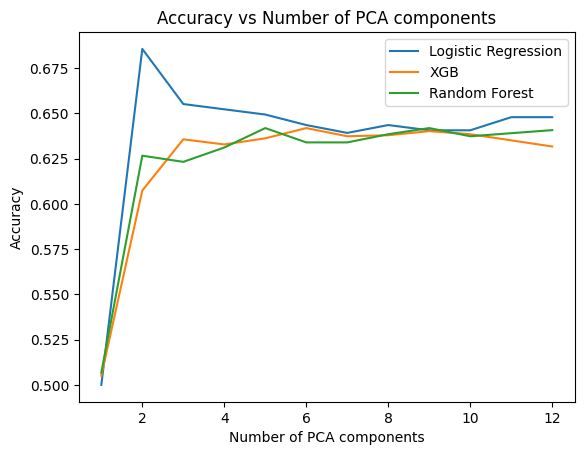

In [ ]:
sns.lineplot(x = x["pca_n_components"], y = x["accuracy"], label = "Logistic Regression")
sns.lineplot(x = y["pca_n_components"], y = y["accuracy"], label = "XGB")
sns.lineplot(x = z["pca_n_components"], y = z["accuracy"], label = "Random Forest")
plt.xlabel("Number of PCA components")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of PCA components")

Accuracy: 0.6855072463768116
Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.68      0.69       345
           1       0.68      0.69      0.69       345

    accuracy                           0.69       690
   macro avg       0.69      0.69      0.69       690
weighted avg       0.69      0.69      0.69       690



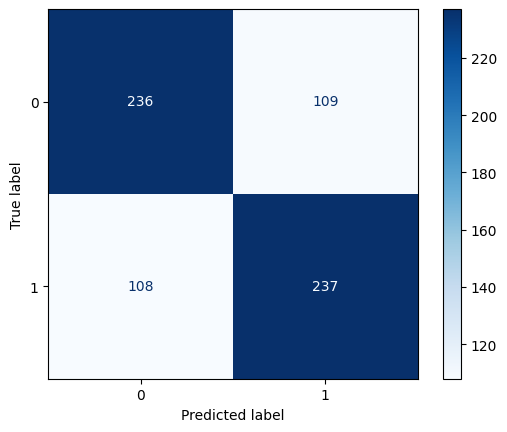

In [ ]:
pca = PCA(n_components=2)
pca.fit(selected_training_features_lg)
training_pca_compnonets = pca.transform(selected_training_features_lg)
testing_pca_compnonets = pca.transform(selected_testing_features_lg)

best_liblinear_log_model = LogisticRegression(
                                 penalty="l1",
                                 solver="liblinear",
                                max_iter=1000)

best_liblinear_log_model = train_test_predict(liblinear_log_model,
                                    training_pca_compnonets,
                                    testing_pca_compnonets,
                                    best_y_train,
                                    best_y_test)

Accuracy: 0.6768115942028986
Classification Report: 
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       345
           1       0.67      0.70      0.68       345

    accuracy                           0.68       690
   macro avg       0.68      0.68      0.68       690
weighted avg       0.68      0.68      0.68       690



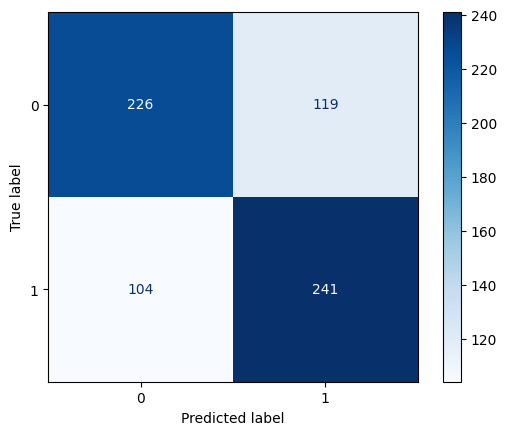

In [ ]:
pca = PCA(n_components=5)
pca.fit(selected_training_features_rf)
training_pca_compnonets = pca.transform(selected_training_features_rf)
testing_pca_compnonets = pca.transform(selected_testing_features_rf)

best_rf = RandomForestClassifier(n_estimators=100, max_depth=3)

best_rf = train_test_predict(best_rf,
                                    training_pca_compnonets,
                                    testing_pca_compnonets,
                                    best_y_train,
                                    best_y_test)

Accuracy: 0.6739130434782609
Classification Report: 
              precision    recall  f1-score   support

           0       0.68      0.67      0.67       345
           1       0.67      0.68      0.68       345

    accuracy                           0.67       690
   macro avg       0.67      0.67      0.67       690
weighted avg       0.67      0.67      0.67       690



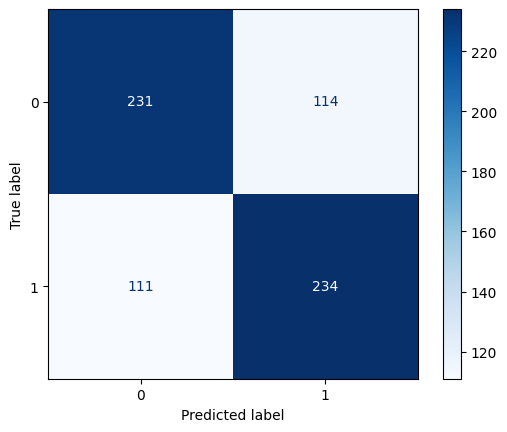

In [ ]:
pca = PCA(n_components=6)
pca.fit(selected_training_features_xgb)
training_pca_compnonets = pca.transform(selected_training_features_xgb)
testing_pca_compnonets = pca.transform(selected_testing_features_xgb)

best_xgb = XGBClassifier(learning_rate = 0.2, n_estimators=10, max_depth=3)

best_xgb = train_test_predict(best_xgb,
                                    training_pca_compnonets,
                                    testing_pca_compnonets,
                                    best_y_train,
                                    best_y_test)